# SIT 720 Assignment 2
Bryon Baker

Student number: 85031775

# Install required libraries

In [1]:
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install yellowbrick

You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
import random
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

In [3]:
# Seed the random nunmber generator to ensure K-Means randomisation works properly.
random.seed()

print(f"Seeding random number generator. Random number is: {random.random()}")

Seeding random number generator. Random number is: 0.9135313312604828


In [4]:
# Uncomment this line for debugging dataframe contents.
#np.set_printoptions(threshold=np.inf)

# Part 1

## Load the SCADI Dataset

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://raw.githubusercontent.com/bryonbaker/datasets/main/SIT720/Ass2/SCADI.csv'
full_df = pd.read_csv(url)
print(f"{full_df.head()}\n")

   Gender  Age  d 5100-0  d 5100-1  d 5100-2  d 5100-3  d 5100-4  d 5100-8  \
0       0   18         0         0         0         0         1         0   
1       0   22         0         0         0         0         1         0   
2       0   18         0         0         0         1         0         0   
3       1   18         0         0         0         0         1         0   
4       0   19         0         0         0         0         1         0   

   d 5100-9  d 5101-0  ...  d 57022-8  d 57022-9  d 571-0  d 571-1  d 571-2  \
0         0         0  ...          0          0        0        0        0   
1         0         0  ...          0          0        0        0        0   
2         0         0  ...          0          0        0        0        0   
3         0         0  ...          0          0        0        0        1   
4         0         0  ...          0          0        0        0        1   

   d 571-3  d 571-4  d 571-8  d 571-9  Classes  
0      

In [6]:
# Display stats on the data frame
shape = full_df.shape
print(f"Initial shape: {shape}")

Initial shape: (70, 206)


# Question 1
1. Determine the number of subgroups (clusters) from the dataset using attributes 3-255.
2. Is this the same as the number of classes presented by attribute 206 (Classes)? 
3. Explain and justify your findings.

In [7]:
# Count the number of classes in the dataset before we drop the column. This is used in Question 3
num_classes_in_dataset = full_df['Classes'].nunique()
print(f"Number of unique classes in the original dataset is: {num_classes_in_dataset}")

# Drop attributes: 1, 2, and 205
df = full_df.drop(["Gender","Age","Classes"], axis=1)
shape = df.shape
print(f"New shape: {shape}")
print(f"{df.head()}")

Number of unique classes in the original dataset is: 7
New shape: (70, 203)
   d 5100-0  d 5100-1  d 5100-2  d 5100-3  d 5100-4  d 5100-8  d 5100-9  \
0         0         0         0         0         1         0         0   
1         0         0         0         0         1         0         0   
2         0         0         0         1         0         0         0   
3         0         0         0         0         1         0         0   
4         0         0         0         0         1         0         0   

   d 5101-0  d 5101-1  d 5101-2  ...  d 57022-4  d 57022-8  d 57022-9  \
0         0         0         0  ...          0          0          0   
1         0         0         0  ...          0          0          0   
2         0         0         0  ...          0          0          0   
3         0         0         0  ...          0          0          0   
4         0         0         0  ...          0          0          0   

   d 571-0  d 571-1  d 571-2  d 57

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


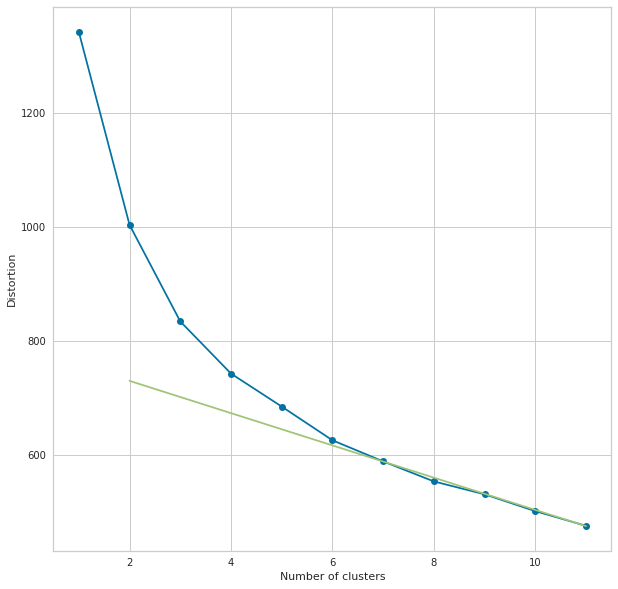

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
ref_xLine = [2,11]
ref_yLine = [625, 475]

min_k = 1
max_k = 12
for n in range(min_k,max_k):
    km = KMeans( n_clusters=n, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0 )
    y_km = km.fit(df)
    distortions.append(km.inertia_)

# Calculate the co-ordinates of the reference line that passes through the points at k=6 and k = 11
x1 = num_classes_in_dataset
x2 = max_k-1
y1 = distortions[num_classes_in_dataset-1]
y2 = distortions[max_k-2]
m =  (y2 - y1) / (x2 - x1)
c = y1 - (m * x1)
ref_y1 = (m * 2) + c    # Calc the left of the reference line
ref_yLine[0] = ref_y1
    
# Scale the plot so the reference line is more distinct form the reference line
fig = plt.figure()
fig.set_size_inches(10,10)

# plot the elbow chart and include a reference line based on the number of classes in the dataset.
plt.plot(range(min_k, max_k), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

# Plot the reference line to highlight where the elbow is located.
# The reference line is used to help discuss any differences between optimal clusters from the elbow versus what is in the dataset.
plt.plot(ref_xLine, ref_yLine, label = "line 1")

plt.show()

# Question 2
For the dataset, perform PCA. 
1. plot the captured variance with respect to increasing latent dimensionality.

   What is the minimum dimension that captures:
    - At least 89% variance
    - At least 99% variance

Number of comoponets: 70
PCA details => PCA(n_components=70)
Explained Variance:
[1.88806809e-01 1.40294493e-01 9.28576978e-02 5.55026572e-02
 4.61869047e-02 4.34725875e-02 3.69877993e-02 3.13335959e-02
 2.84580857e-02 2.76366269e-02 2.54158872e-02 2.29197949e-02
 2.19763646e-02 1.99686493e-02 1.71542044e-02 1.68217640e-02
 1.49495489e-02 1.35025077e-02 1.30312569e-02 1.21237442e-02
 1.17685546e-02 9.66224236e-03 8.63248486e-03 7.84566734e-03
 7.59307576e-03 7.12095577e-03 6.55889086e-03 6.12964769e-03
 5.91117990e-03 5.17548744e-03 5.03651222e-03 4.65382307e-03
 4.39521523e-03 4.10905658e-03 3.56350637e-03 3.48557543e-03
 3.19702197e-03 2.97311722e-03 2.42793434e-03 2.24198157e-03
 2.01187470e-03 1.91211156e-03 1.86048071e-03 1.69712604e-03
 1.56776044e-03 1.23397690e-03 1.10068456e-03 9.44378334e-04
 9.25930483e-04 7.94493095e-04 6.85276056e-04 5.32382661e-04
 5.02833242e-04 4.16181322e-04 3.63010110e-04 3.39694589e-04
 2.48292321e-04 2.40044414e-04 1.69408256e-04 1.53845295e-04
 1.3

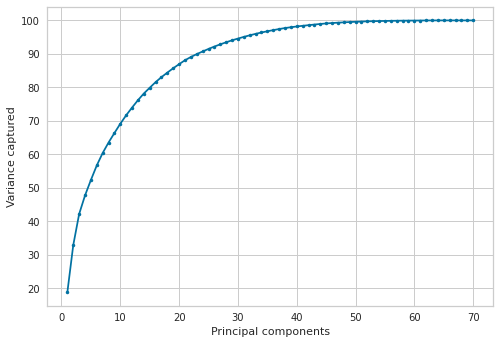

In [9]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Normalise all of the data to ensure they are of similar magnitude.
Xnorm = scale(df)

# Perform the Principal Component Analysis. The number of components is the number of coumns in the dataset.
# The number of components is the minimum of the number of data elements and festures 
n_components=min(df.shape[0], df.shape[1])
print("Number of comoponets: {}".format(n_components))
pca = PCA(n_components)
pca.fit(Xnorm)
print("PCA details => {}".format(pca))

print('='*50)
print("Explained Variance:")
# Calculate the amount of variance explained by each PC
var= pca.explained_variance_ratio_
print(var)

print('='*50)
print("Cumulative Explained Variance:")

#cum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
cum_var=np.cumsum(pca.explained_variance_ratio_*100)
print(cum_var)

pca_num = a_list = list(range(1, n_components+1))
plt.plot(pca_num, cum_var, marker='.')
plt.xlabel("Principal components")
plt.ylabel("Variance captured")
plt.show()

dimensions = {}

# Find the minimum dimensions that capture 89% and 99% respectively
#num_dimensions = next(k for k, value in enumerate(cum_var) if value >= 89) 
#print("Minimum dimension for at least 89% variance is: ", num_dimensions)
#dimensions[89] = num_dimensions

#num_dimensions = next(k for k, value in enumerate(cum_var) if value >= 99) 
#print("Minimum dimension for at least 99% variance is: ", num_dimensions)
#dimensions[99] = num_dimensions

num_dimensions = 0
for value in cum_var:
    if value >= 89:
        dimensions[value]=num_dimensions
        break
    num_dimensions += 1

num_dimensions = 0
for value in cum_var:
    if value >= 99:
        dimensions[value]=num_dimensions
        break
    num_dimensions += 1

print('='*50)

# The "dictionary" tuple contains a map of >= 89%, variance and >=99%, variance. This is used in the next question.

# Question 3
Determine the purity of the clusters formed by the number of principal components that captured 89% and 99% variances respectively. Plot a line ghraph of the purity scores against the captured variances.

Discuss your findings.

### Helper functions
The following code segment defines some helper functions for calculating clulstering purity

In [10]:
# Takes a list that may contain duplicates and returns a list with unique ites.
def uniqueList(list1):
    # insert the list to the set
    list_set = set(list1)
    # convert the set to the list
    unique_list = (list(list_set))
    unique_list.sort()
    return unique_list

# Searches a Series and finds the item that appears with the greatest frequency and returns the count.
def findMaxLabel( data ):
    unique, counts = np.unique(data, return_counts=True)
    # print(np.asarray((unique, counts)).T)
    idx = np.argmax(counts, axis=0)
    # print(f"Index of max: {idx}")

    return unique[idx], counts[idx]

# Given a dataframe of columns "cluster" and "label", it calculates the cluster purity
def calculatePurity(data):
    print("INFO: Calculating clustering purity.")
    #print("INFO: Input data:\n{}".format(data))
          
    assert data.shape[1] > 0        # Check we won't have a divide by zero error later

    # Get a list of clusters that has no duplicates so we can use it as a key.
    clusterList = uniqueList(data['cluster'])
    # print(f"Cluster list: {clusterList}")

    # Go through each cluster one by one.
    runningSum = 0
    for c in clusterList:
        # print(f"INFO: Counting instances in cluster {c}")
        m1,m2 = findMaxLabel(data[data["cluster"] == c]["label"])
        print("INFO: Maximum frequency in cluster {} is label {}. It has a count of {}.".format(c,m1,m2))
        runningSum = runningSum + m2

    purity = runningSum / data.shape[0]

    return purity

### Calculate Purity

In [11]:
# Using the optimal number of clusters found in question 1, perform a K-Means clustering for the num_dimensions found in question 2 and calculate the purity score
# To measure pruity we need to count the majority label in a cluster and assign the cluster that label. However, the labels have been removed because we to not want the label to be part of the clustering.
# This method therefore will perform k-means on the non-PCA dataset and 

# Using the dictionary of cumulative variance and number of principal components created in the earlier question
# Calculate the purity score for each.

# Creaye a data frame for the final plot.
results_df = pd.DataFrame(columns=['purity_score', 'variance'])

for percentage in dimensions:
    print("\n"+"="*60)
    n = dimensions[percentage]
    print("INFO: Calculate the the purity score for {:.4f}% CV using {} dimensions:".format(percentage,n))
    
    # Perform the dimensionality reduction using the supplied number of components.
    pca = PCA(n_components=n)
    Zred = pca.fit_transform(Xnorm)
    print("INFO: Xnorm shape: {}".format(Xnorm.shape))
    print("INFO: Zred shape: {}".format(Zred.shape))
    
    # Perform the K-Means clustering. Given the anlysis in Q1 we will use the number of classes in the original dataset for this clustering activity.
    km = KMeans( n_clusters=num_classes_in_dataset, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0 )
    y_km = km.fit(Zred)
    
    # The K-Means clustering algorithm preserves the order of the input data in the resultant labels. Using the clusters defined during training, 
    # Create a nx2 table of the identified clusters and the class labels in the input dataset. Use this to calculate the cluster purity.
    d = pd.concat([pd.Series(y_km.labels_),pd.Series(full_df['Classes'].array)], axis=1)
    d.columns = ['cluster', 'label']
    # print("Allocation of labels to clusters is:\n{}".format(d))
    purity = calculatePurity(d)
    print(f"INFO: Purity score is: {purity}")
    results_df = results_df.append({'purity_score': purity, 'variance': percentage}, ignore_index=True)
    

# Print the summary results
print("\n"+"#"*60)
print("Purity scores by cumulative variance results:")
print(results_df)


print("#"*60+"\n")


INFO: Calculate the the purity score for 89.0832% CV using 21 dimensions:
INFO: Xnorm shape: (70, 203)
INFO: Zred shape: (70, 21)
INFO: Calculating clustering purity.
INFO: Maximum frequency in cluster 0 is label class7. It has a count of 5.
INFO: Maximum frequency in cluster 1 is label class6. It has a count of 1.
INFO: Maximum frequency in cluster 2 is label class6. It has a count of 27.
INFO: Maximum frequency in cluster 3 is label class2. It has a count of 5.
INFO: Maximum frequency in cluster 4 is label class7. It has a count of 6.
INFO: Maximum frequency in cluster 5 is label class4. It has a count of 10.
INFO: Maximum frequency in cluster 6 is label class7. It has a count of 5.
INFO: Purity score is: 0.8428571428571429

INFO: Calculate the the purity score for 99.0932% CV using 44 dimensions:
INFO: Xnorm shape: (70, 203)
INFO: Zred shape: (70, 44)
INFO: Calculating clustering purity.
INFO: Maximum frequency in cluster 0 is label class7. It has a count of 5.
INFO: Maximum freque

### Plot the Graphs
Plot a line graph of the purity scores against the 

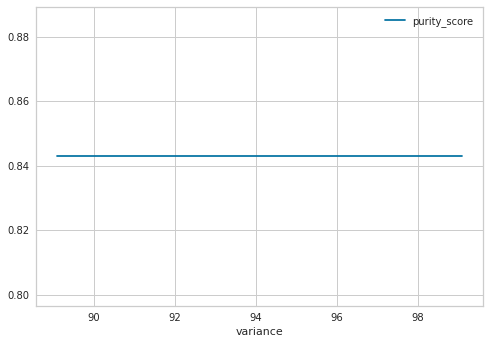

In [12]:
# gca stands for 'get current axis'
ax = plt.gca()

results_df.plot(kind='line',x='variance',y='purity_score',ax=ax)

plt.show()

# QUESTION 4:
Let's assume you have two datasets, one is linear and the other is curved structural data.
1. Can we apply PCA on these datasets? Justify your answer

Refer to writeup for details.

# Part 2

In [27]:
# Before these are two distinct machine learning parts in the one notebook, reset all the variables to avoid interference.
%reset -f

In [28]:
import random
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

# Part 2: SCADI Dataset

## Question 5
* Download the attached heartdisease.csv file. 
* Read the file and separate the class and feature matrix.

In [33]:
# Takes a list that may contain duplicates and returns a list with unique ites.
def uniqueList(list1):
    # insert the list to the set
    list_set = set(list1)
    # convert the set to the list
    unique_list = (list(list_set))
    unique_list.sort()
    return unique_list

# Searches a Series and finds the item that appears with the greatest frequency and returns the count.
def findMaxLabel( data ):
    unique, counts = np.unique(data, return_counts=True)
    # print(np.asarray((unique, counts)).T)
    idx = np.argmax(counts, axis=0)
    # print(f"Index of max: {idx}")

    return unique[idx], counts[idx]

# Given a dataframe of columns "cluster" and "label", it calculates the cluster purity
def calculatePurity(data):
    print("INFO: Calculating clustering purity.")
    #print("INFO: Input data:\n{}".format(data))
          
    assert data.shape[1] > 0        # Check we won't have a divide by zero error later

    # Get a list of clusters that has no duplicates so we can use it as a key.
    clusterList = uniqueList(data['cluster'])
    # print(f"Cluster list: {clusterList}")

    # Go through each cluster one by one.
    runningSum = 0
    for c in clusterList:
        # print(f"INFO: Counting instances in cluster {c}")
        m1,m2 = findMaxLabel(data[data["cluster"] == c]["label"])
        print("INFO: Maximum frequency in cluster {} is label {}. It has a count of {}.".format(c,m1,m2))
        runningSum = runningSum + m2

    purity = runningSum / data.shape[0]

    return purity

In [34]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://raw.githubusercontent.com/bryonbaker/datasets/main/SIT720/Ass2/heartdisease.csv'
unpruned_df = pd.read_csv(url)

print("Shape of data upon read: {}".format(unpruned_df.shape))
# Drop the rows with missing values
unpruned_df = unpruned_df.apply (pd.to_numeric, errors='coerce')# Anything non-numeric is NaN
print(unpruned_df)
unpruned_df = unpruned_df.dropna()
full_df = unpruned_df.reset_index(drop=True)

# Display meta data about the dataframe.
print("Shape of data post row pruning: {}\n".format(full_df.shape))
print("Dataframe structure:\n{}".format(full_df.dtypes))

# Separate the features form the labels
X = full_df.drop(['num'], axis=1)
y = full_df['num']
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Display information about the contents to aid quality inspection.
print("\n"+"*"*75)
print("Dataframe Content Summary\n"+"*"*75)
print("\nFeatures:\n"+"="*10+"\n{}".format(X))
print("\nClasses:\n"+"="*10+"\n{}".format(y))

Shape of data upon read: (303, 14)
     Age  Sex  chest pain type  Trestbps  chol  fbs  restecg  thalach  exang  \
0     63    1                1       145   233    1        2      150      0   
1     67    1                4       160   286    0        2      108      1   
2     67    1                4       120   229    0        2      129      1   
3     37    1                3       130   250    0        0      187      0   
4     41    0                2       130   204    0        2      172      0   
..   ...  ...              ...       ...   ...  ...      ...      ...    ...   
298   45    1                1       110   264    0        0      132      0   
299   68    1                4       144   193    1        0      141      0   
300   57    1                4       130   131    0        0      115      1   
301   57    0                2       130   236    0        2      174      0   
302   38    1                3       138   175    0        0      173      0   

    

## Question 6
* Determine the number of clusters from the dataset. Is this the same as the actual number of classes in the dataset?

INFO: The breakdown of labels in the dataset are:
0    160
1     54
2     35
3     35
4     13
Name: num, dtype: int64


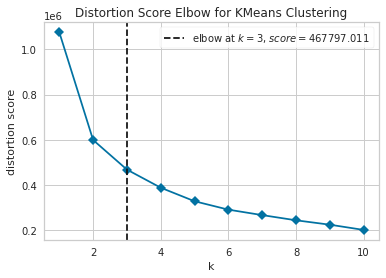

Cluster/Label relationship:
The number of unique labels in the dataset is: 5
Optimal number of clusters is: 3


In [35]:
# Scan through the labels and count the number of unique values.
num_labels = y.nunique()
print("INFO: The breakdown of labels in the dataset are:\n{}".format(y.value_counts()))

# Find the optimal number of clusters for the dataset
model = KMeans()
elbowChart = KElbowVisualizer(model, k=(1, 11), timings=False)

elbowChart.fit(X) # Fit the data to the visualiser
elbowChart.show() # Plot the graph and the elbow
plt.show()
optimalClusters = elbowChart.elbow_value_

print("Cluster/Label relationship:")
print(f"The number of unique labels in the dataset is: {num_labels}")
print(f"Optimal number of clusters is: {optimalClusters}")

# Question 7:

Perform K-Means clustering on the complete dataset and report the purity score.

In [36]:
# instatiate KMeans class and set the number of clusters to the optimal number returned form the elbow chart
model = KMeans(n_clusters=optimalClusters, random_state=10)

#X.reset_index(drop=True)
# call fit method with data 
km_result = model.fit(X)

# coordinates of cluster center
centroids = model.cluster_centers_ 

In [37]:
# The K-Means clustering algorithm preserves the order of the input data in the resultant labels. Using the clusters defined during training, 
# Create a nx2 table of the identified clusters and the class labels in the input dataset. Use this to calculate the cluster purity.
ls = pd.Series(y).astype(int)
ys = pd.Series(km_result.labels_).astype(int)
d = pd.concat([ys,ls], axis=1)
d.columns = ['cluster', 'label']

# print("Allocation of labels to clusters is:\n{}".format(d))
purity = calculatePurity(d)
print(f"\nNumber of clusters usefd for KMeans: {optimalClusters}")
print("Total number of data points in clusters is {}".format(y.shape[0]))
print("Purity of clustering is: {:.4f}%".format(purity))

INFO: Calculating clustering purity.
INFO: Maximum frequency in cluster 0 is label 0. It has a count of 67.
INFO: Maximum frequency in cluster 1 is label 0. It has a count of 65.
INFO: Maximum frequency in cluster 2 is label 0. It has a count of 28.

Number of clusters usefd for KMeans: 3
Total number of data points in clusters is 297
Purity of clustering is: 0.5387%


## Discussion:
The data set is very imbalanced, there are
* 164 elements with label 0
* 55 with label 1
* 36 with label 2
* 35 with label 3
* 13 with label 4

As a result, it is not surprising that label 0 is overshadowing the purity of the clustering

# Question 8. 
There are several distance metrics for K-Means such as euclidean, squared euclidian, Manhattan, Chebyshev, Minowski.
  * Your job is to compare the purity score of k-means clustering for different distance metrics
  * Select the best distance metric and explain why this distance metric is best for the given dataset.

In [38]:
# Reference: 
#    The following code snippet is based on the work of Arush Chillar, 2021
#    Blog url: https://www.kaggle.com/code/arushchillar/kmeans-clustering-using-different-distance-metrics/notebook

from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}

# PyClustering uses an array and not a dataframe so need to convert the type.
numpy_X = X.to_numpy()

print(f"\nINFO: Number of clusters used for KMeans: {optimalClusters}")
print("INFO: Total number of data points in clusters is {}".format(numpy_X.shape[0]))

results_df = pd.DataFrame(columns=['purity', 'metric'])

for measure, value in distance_measures.items():
    print("*"*50)
    print(f"INFO: Calculating purity for {measure} distance\n")
    
    initial_centers = random_center_initializer(numpy_X, optimalClusters, random_state=10).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(numpy_X, initial_centers=initial_centers, metric=distance_metric(value))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    # pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, numpy_X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    
    # calculatePurity requires a 2D list so combin the two lists/Series into a single 2D daraframe
    d = pd.concat([y,pd.Series(pyLabels)], axis=1)
    d.columns = ['cluster', 'label']
    purity = calculatePurity(d)
    results_df = results_df.append({'purity':purity,'metric':measure}, ignore_index = True)
    
    print("INFO: The purity score for {} distance is {:.4f}%".format(measure, purity))
    print("*"*50+"\n")


INFO: Number of clusters used for KMeans: 3
INFO: Total number of data points in clusters is 297
**************************************************
INFO: Calculating purity for euclidean distance

INFO: Calculating clustering purity.
INFO: Maximum frequency in cluster 0 is label 1. It has a count of 70.
INFO: Maximum frequency in cluster 1 is label 1. It has a count of 31.
INFO: Maximum frequency in cluster 2 is label 1. It has a count of 15.
INFO: Maximum frequency in cluster 3 is label 1. It has a count of 16.
INFO: Maximum frequency in cluster 4 is label 0. It has a count of 5.
INFO: The purity score for euclidean distance is 0.4613%
**************************************************

**************************************************
INFO: Calculating purity for squared euclidean distance

INFO: Calculating clustering purity.
INFO: Maximum frequency in cluster 0 is label 1. It has a count of 70.
INFO: Maximum frequency in cluster 1 is label 1. It has a count of 31.
INFO: Maximum f

In [39]:
print("*"*50)
print("SUMMARY")
print("*"*50)
print(results_df)

max_purity_df = results_df[results_df.purity == results_df['purity'].max()]
max_purity_df = max_purity_df.reset_index()  # make sure indexes pair with number of rows
for index, row in max_purity_df.iterrows():
    print("The best distance metric(s) is: {} with {:.4}% purity.".format(row['metric'], row['purity']))

**************************************************
SUMMARY
**************************************************
     purity             metric
0  0.461279          euclidean
1  0.461279  squared euclidean
2  0.451178          manhattan
3  0.427609          chebyshev
4  0.767677           canberra
5  0.626263         chi-square
The best distance metric(s) is: canberra with 0.7677% purity.


# QUESTION: 9
Use selection criteria (ANOVA, Chi-squared) to select the best three features and use them for K-Means clustering.
Based on the purity score, which features are you going to recommend and why?

In [40]:
# import the feature selection packages from sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif


In [41]:
def plotFeaturePerformance( fs ):
    # what are scores for the features
    #for i in range(len(fs.scores_)):
    #    print('Feature %d: %f' % (i, fs.scores_[i]))
        
    # plot the scores
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    plt.show()

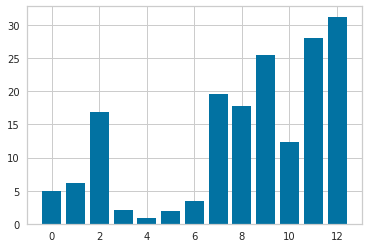

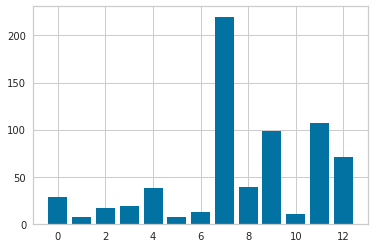

In [49]:
# Define the number of features Q9 has asked to find.
num_features = 3

def selectFeatures( X_train, y_pred, criteria ):
    fs = SelectKBest(criteria, k=num_features)
    fs.fit(X,y)
    new_x_train = fs.transform(X)
    # print(new_x_train)
    
    return new_x_train, fs

# Find the n best features using ANOVA.
new_x_train1, fs1 = selectFeatures( X, y, f_classif )
plotFeaturePerformance( fs1 )

# Find the n best features using Chi-squared.
new_x_train2, fs2 = selectFeatures( X, y, chi2 )
plotFeaturePerformance( fs2 )


In [48]:
print("CALCULATING PURITY WITH FEATURES USING ANOVA")
# instatiate KMeans class and set the number of clusters to the optimal number returned form the elbow chart
model = KMeans(n_clusters=optimalClusters, random_state=10)

# call fit method with data 
km_result = model.fit(new_x_train1)

# The K-Means clustering algorithm preserves the order of the input data in the resultant labels. Using the clusters defined during training, 
# Create a nx2 table of the identified clusters and the class labels in the input dataset. Use this to calculate the cluster purity.
ls = pd.Series(y).astype(int)
ys = pd.Series(km_result.labels_).astype(int)
d = pd.concat([ys,ls], axis=1)
d.columns = ['cluster', 'label']

# print("Allocation of labels to clusters is:\n{}".format(d))
purity = calculatePurity(d)
print(f"\nNumber of clusters usefd for KMeans: {optimalClusters}")
print("Total number of data points in clusters is {}".format(y.shape[0]))
print("Purity of clustering is: {:.4f}%".format(purity))

CALCULATING PURITY WITH FEATURES USING CHI-SQUARED
INFO: Calculating clustering purity.
INFO: Maximum frequency in cluster 0 is label 0. It has a count of 59.
INFO: Maximum frequency in cluster 1 is label 0. It has a count of 82.
INFO: Maximum frequency in cluster 2 is label 3. It has a count of 21.

Number of clusters usefd for KMeans: 3
Total number of data points in clusters is 297
Purity of clustering is: 0.5455%


In [ ]:
print("CALCULATING PURITY WITH FEATURES USING CHI-SQUARED")
# instatiate KMeans class and set the number of clusters to the optimal number returned form the elbow chart
model = KMeans(n_clusters=optimalClusters, random_state=10)

# call fit method with data 
km_result = model.fit(new_x_train1)

# The K-Means clustering algorithm preserves the order of the input data in the resultant labels. Using the clusters defined during training, 
# Create a nx2 table of the identified clusters and the class labels in the input dataset. Use this to calculate the cluster purity.
ls = pd.Series(y).astype(int)
ys = pd.Series(km_result.labels_).astype(int)
d = pd.concat([ys,ls], axis=1)
d.columns = ['cluster', 'label']

# print("Allocation of labels to clusters is:\n{}".format(d))
purity = calculatePurity(d)
print(f"\nNumber of clusters usefd for KMeans: {optimalClusters}")
print("Total number of data points in clusters is {}".format(y.shape[0]))
print("Purity of clustering is: {:.4f}%".format(purity))